# TASKS
This notebook is for solutions to the various task assignments part of the Fundamentals of Data Analysis Module at GMIT.

The author is me, Keith Ryan (g00387816@gmit.ie).

## Task 1 Brief - Write a Python function called Counts
This function takes a list as input and returns a dictionary of unique items in the list as keys and the number of times each item appears as values.  So, the input ['A','A','B','C','A'] should have output {'A': 3,'B': 1,'C': 1}.

Your code should not depend on any module from the standard library or otherwise. You should research the task first and include a description with references of your algorithm in the notebook.

## Research and thoughts on the problem
At face value to count the number of occurences of each value in a list will first need to loop through every item in list. As it loops through item by item check has this item already been seen, if so increment some counter by 1, if not set a count of 1 for the current item.
Making this more pythonic, we will need a list as an input, a dict to store the items of the list (key) a count of the number of occurences of that specific item (value) and the input list will be iterated through using a for loop.
The list and for loop are pretty self-explanatory but how to add items to a dictionary and check if one has already been added is the more involved part.

In [3]:
#creating a dict object and assigning a value to a key
#dictionaries operate as a key-pair or key-value, where when you supply a key to a dict object it 
# returns the corresponding value
test_dict = {}
print(type(test_dict))
test_dict['a'] = 1
print(f"Printing the entire dict - {test_dict}")
print(f"Printing the dict's key-value - {test_dict['a']}")

<class 'dict'>
Printing the entire dict - {'a': 1}
Printing the dict's key-value - 1


For checking whether key exists dict.get() seems like best approach. - [dict.get() documentation](https://docs.python.org/3/library/stdtypes.html?highlight=#dict.get)

The next cell is testing this idea out in a for loop and then turning that bit of logic into a function.


In [4]:
#first I need a list to test with
test_list = ['A', 'B', 'X', 'Y', 'X', 'A', 'A']
#next I will need a dictionary for storing the key-value pairs
test_dict = {}

#simple for loop to iterate through the list
for i in test_list:
    print(i, end=' ')
    #second arg for .get is 0, .get returns this value should the key not exist
    test_dict[i] = test_dict.get(i,0) + 1
    '''
    Older solution, can be done in single line instead taking advantage of get return value if nothing found
    if test_dict.get(i, False) == False:
        test_dict[i] = 1 #add key and set value to one
    else: 
        test_dict[i] += 1 #increment key value
        
    '''
print() #introduce a new line between previous print and next print
print(test_dict)

A B X Y X A A 
{'A': 3, 'B': 1, 'X': 2, 'Y': 1}


## Taking tested solution and enclosing with function

In [5]:

def list_to_dict(input_list):
    #initialise blank dict
    output_dict = {}
    #loop through provided list
    for item in input_list:
        #taking advantage of dict.get return, if item not found in dict return 0 then add 1
        output_dict[item] = output_dict.get(item, 0) + 1
    
    return output_dict #return the dictionary

In [6]:
print(f"Provided list - {test_list}")
returned_dict = list_to_dict(test_list) #store the result from function call in variable my_dict, then print it
print(f"Count of items in list - {returned_dict}")

Provided list - ['A', 'B', 'X', 'Y', 'X', 'A', 'A']
Count of items in list - {'A': 3, 'B': 1, 'X': 2, 'Y': 1}


## Alternate way of getting same count
Instead of using dict.get to verify whether key already exists or not, it's simpler to just use list.count() to return a count of the specified item within the list. - [see list.count() in python3 datastructures documentation](https://docs.python.org/3/tutorial/datastructures.html)

Interestingly the count function likewise works for tuples.

In [7]:
#initially did this without a set, but can make it more efficient if using a set to first convert the list to just it's unique items
#in practice this will probably not generally be an issue, but in cases of massive lists, would probably be a very efficient approach
unique_items_set = set(test_list) 
print(unique_items_set)
my_dict = {}
for i in unique_items_set:
    my_dict[i] = test_list.count(i)
print(my_dict)

{'A', 'B', 'X', 'Y'}
{'A': 3, 'B': 1, 'X': 2, 'Y': 1}


In [8]:
def list_count_to_dict(input_list):
    #convert list into set to get unique values of the list
    input_set = set(input_list)
    #initialise blank dictionary
    output_dict = {}
    #iterate through each item in set (e.g. each unique value from input_list)
    for item in input_set:
        output_dict[item] = input_list.count(item) #output_dict keys are equal to the count of that item from the list
        
    return output_dict

In [9]:
#Returns the counted dict object
print(f"Provided list - {test_list}")
returned_dict = list_count_to_dict(test_list)
print(f"Count of items in list - {returned_dict}")

Provided list - ['A', 'B', 'X', 'Y', 'X', 'A', 'A']
Count of items in list - {'A': 3, 'B': 1, 'X': 2, 'Y': 1}


In [10]:
%%timeit
list_to_dict(test_list)

664 ns ± 5.62 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [11]:
%%timeit
list_count_to_dict(test_list)

869 ns ± 24.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


# Summary and Conclusion of Task 1
I found 2 different ways of getting the number of times an item appears in a list.
The first was the more obvious solution to me, knowing that as we iterate through a list we can simply add to the dictionary and increment as we go but also accounting for when the item does not already exist in the dictionary.

- First was simply to iterate through the list, checking whether the item was already present in the dictionary object, if it was not present add the item to the dictionary and set its value to 1, if it is present increment its value by 1
- Alternative solution is to create a set out of the given list to get all of the unique values, then iterating through the set add each item to the dictionary object and set its value equal to the count of that item from the list. This solution has a quirk by changing the order the list items appear in, so if the order of items appearing in the list were to matter this would not work as a solution.

In practice I would gravitate more towards the second function which uses a Set to get just the unique items in the list and then iterating through the Set assign each item as a key in the dictionary and put its value as the count of that item from the list - the advantage of this appraoch is you are not looping through for every item in a list, instead you loop through each unique item in the list by taking advantage of how Sets work and inbuilt list functions.
***


# Task 2 Brief - Write a Python function called dicerolls
The task this time is to create a function that simulates rolling dice, it should take two parameters, the number of dice and the number of times to roll them. The function will simulate random rolls of the dice and keep track of the total number of occurences of the sum of the dice rolls.

After the function has finished it returns a dictionary object holding the number of occurrences the different dice face totals occurred.

`{2:19,3:50,4:82,5:112,6:135,7:174,8:133,9:114,10:75,11:70,12:36}`

In [12]:
#With this function I want to show what kind of size of dictionary will eventually be returned by the dicerolls function
#the more dice you add, the more face totals there will be
def exploring_dicerolls(n_dice, n_rolls):
    print(f"Number of dice selected {n_dice} to roll {n_rolls} times")
    print(f"Minimum face total = {n_dice}")
    print(f"Maximum face total = {n_dice*6}")
    
#try different numbers of dice to show min and max face totals
exploring_dicerolls(2,1000)
exploring_dicerolls(4,10)

Number of dice selected 2 to roll 1000 times
Minimum face total = 2
Maximum face total = 12
Number of dice selected 4 to roll 10 times
Minimum face total = 4
Maximum face total = 24


## Research and attempts
***
Exploring the task in earnest now, I can see that we will need to use a library to produce random numbers, unfortunately given the task brief I can only make use of the Standard Python Library, which in this case rules out numpy.random.

Handily though the Standard Python Library does have a package that should do exactly what is needed for the dice rolls https://docs.python.org/3/library/random.html

Specifically the module random.randint is relevant here as I only want to return an integer value and want to specify 2 numbers as the limits.

Initially I thought of a shortcut, where instead of doing individual dice rolls I could instead just get a random number between the min and max of the face totals of the dice rolled, however in practice I saw the issue with this pretty quickly and have imported matplotlib below to illustrate.

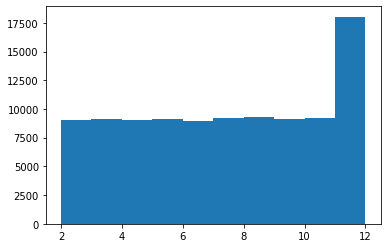

In [13]:
import random
import matplotlib.pyplot as plt

n_dice = 2
n_rolls = 100000
my_list = []
for i in range(n_rolls):
    my_list.append(random.randint(n_dice, n_dice*6))
plt.hist(my_list);

The above histogram plot was very surprising, I expected to see a uniform (practically flat) distribution but instead see a peak around 12.

After a bit of playing around with the histogram plot I realised it was down to the number of bins used, as you can see above the last bar around 12 is about twice the height of all the other bars so the bar at 12 is actually covering 11 and 12, see corrected histogram plot below.

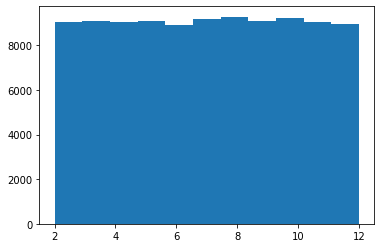

In [14]:
# want the number of bins to be 1 greater than the max minus the min 
# as we want our bins to be inclusive of every point on the range.
num_bins = ((n_dice*6) - n_dice) + 1 
plt.hist(my_list, bins=num_bins);

The issue with the above is that it is not representative of what we would expect to see when rolling dice, when rolling dice (and as illustrated with example Ian provided in the Assignment) we should see a normal distribution, where values to the min and max of the range appear less frequently than those in the middle.

If we rolled two dice a number of times, values like 2 and 12 occur less frequently than more central values like and the reason for this is very simple. You can only get 2 and 12 by rolling 1, 1 and 6, 6 respectively, but for other values like say 5, can instead be made up by a number of potential dice rolls (5 could be rolled with a combination of a 1 and 4, 2 and 3 and those combinations in reverse too as the order they occured could change).

So for 2 and 12 there is only 1 scenario where we can get either face total, but for 5 we have 4 possible scenarios, therefore 5 is more likely to be seen more frequently.

What this means for the function is we need to do independent dice rolls, e.g. a random number between 1 and 6 2 times as opposed to a random number between 2 and 12.

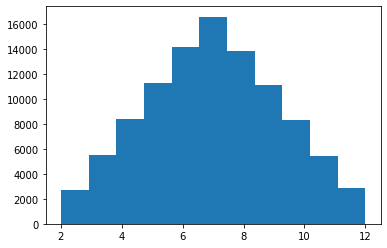

In [15]:
#keeping same structure as before
n_dice = 2
n_rolls = 100000
my_list = []
#but changing how the for loop works
for i in range(n_rolls):
    face_total = 0
    for j in range(n_dice):
        face_total += random.randint(1,6)
    
    my_list.append(face_total)
plt.hist(my_list, bins=num_bins);

The above histogram plot looks much more like what I initially expected to see for the dice rolls.

In [16]:
my_dict = list_count_to_dict(my_list) #using the previous function from Task 1 to count the list
print(my_dict)

{2: 2669, 3: 5466, 4: 8377, 5: 11257, 6: 14163, 7: 16565, 8: 13848, 9: 11108, 10: 8276, 11: 5431, 12: 2840}


***
## Function - diceRolls
***
From the last few cells I think I now have a pretty good way of getting the face totals and their count into a dictionary, so now to convert that into a function that takes inputs

In [17]:
def diceRolls(n_dice, n_rolls):
    face_total_list = []
    #loop by number of rolls
    for i in range(n_rolls):
        face_total = 0 #set face_total to 0 on every new roll
        for j in range(n_dice): #for every dice to be rolled n_dice 
            face_total += random.randint(1,6) #pick a random number from 1 to 6 and add it to face_total
        face_total_list.append(face_total) #after finishing loop to tally face_total, continue roll loop
    
    #finally return a dictionary object in the format {face total : number of occurence} using solution from first task
    return list_count_to_dict(face_total_list)
    

In [18]:
print(diceRolls(1,1000))
print(diceRolls(100,1))
print(diceRolls(10, 10000))

{1: 152, 2: 168, 3: 175, 4: 155, 5: 177, 6: 173}
{341: 1}
{16: 1, 17: 5, 18: 1, 19: 3, 20: 15, 21: 30, 22: 41, 23: 53, 24: 94, 25: 144, 26: 184, 27: 252, 28: 332, 29: 414, 30: 496, 31: 559, 32: 605, 33: 695, 34: 682, 35: 754, 36: 690, 37: 674, 38: 592, 39: 604, 40: 512, 41: 394, 42: 304, 43: 269, 44: 193, 45: 145, 46: 96, 47: 72, 48: 46, 49: 19, 50: 17, 51: 5, 52: 4, 53: 2, 54: 2}


***
# Task 3
## Distribution of coin flips

The third task is to simulate coin flips, specifically it is to simulate the number of heads occurring after 100 coin flips and then simulate that 1000 times, visualising the resulting list/array of 1000 numbers (this is assuming that the coin is fair, so either heads or tails is equally likely).

In [19]:
import numpy as np
rng = np.random.default_rng() #using a default_rng object instead of numpy.random functions directly https://numpy.org/doc/stable/reference/random/generator.html
print("quick test of random number generator -", rng.integers(10))

quick test of random number generator - 1


From the numpy.random documentation the binomial distribution function takes 3 arguments, n for number of trials, p for probability and size for the size of the array to return.

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial

From the task definition from Ian, we know that our size (n) is 100 as we want to flip a coin 100 times and observe the result, secondly we know that our probability (p) is 0.5 as there's a 50% chance for either heads or tails and lastly or size is 1000 as we are simulating this 1000 times overall.

In [55]:
coinflip_binomial = rng.binomial(100,0.5,1000)
print("What the output of the binomial function returns for distribution of 100 coinflips simulated 1000 times\n", coinflip_binomial)
print("Minimum number of heads for 100 coinflips -", min(coinflip_binomial))
print("Minimum number of heads for 100 coinflips -", max(coinflip_binomial))

What the output of the binomial function returns for distribution of 100 coinflips simulated 1000 times
 [55 50 55 46 50 51 44 66 53 56 54 49 45 56 56 46 50 48 54 57 41 43 50 48
 48 42 53 48 41 46 48 48 54 50 53 47 43 48 48 50 53 57 53 44 51 56 60 50
 49 45 46 45 59 52 49 47 48 44 52 45 51 45 52 55 53 54 46 49 51 45 52 53
 44 51 56 56 40 47 51 63 56 41 45 50 47 48 56 51 56 57 45 43 43 45 43 42
 34 46 55 49 60 57 41 43 48 42 42 52 55 52 54 55 55 49 50 55 51 49 51 48
 46 56 48 43 41 51 50 56 48 42 63 60 53 49 58 55 36 52 54 49 48 53 52 48
 56 54 51 49 41 51 46 51 48 46 51 57 56 55 39 54 59 47 55 51 44 51 50 45
 48 49 56 46 51 38 41 52 60 53 52 51 51 57 52 56 45 51 51 41 48 51 48 49
 41 56 48 55 46 47 55 48 53 59 44 49 50 49 48 54 53 52 45 44 55 47 51 46
 49 42 52 55 56 37 53 55 52 48 56 52 47 51 49 56 53 40 47 45 51 42 48 51
 53 52 52 45 46 51 51 39 50 50 48 44 52 61 58 52 56 50 51 52 53 50 50 49
 45 40 57 54 42 48 51 44 48 53 58 51 56 44 43 51 56 50 43 44 51 45 49 47
 56 43 44 46 62 57 

## Visualising the binomial distribution for coin flips
From looking at seaborn documentation it appears that distplot is most appropriate way to visualise the binomial distribution as it combines both a histogram and [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation) into a single plot.
https://seaborn.pydata.org/generated/seaborn.distplot.html

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'binomial distribution for 1000 games of 100 coinflips')

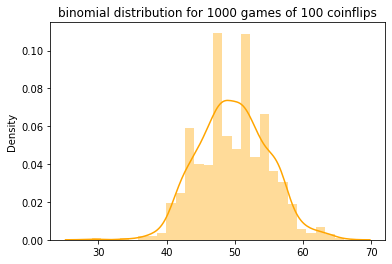

In [59]:
import seaborn as sns
sns.distplot(coinflip_binomial, color='orange').set_title('binomial distribution for 1000 games of 100 coinflips')

We can see from the above distplot that the values do indeed center around 50 with values out towards 40 and 60 being less probable and beyond that very unlikely.

***
### Recreating the Binomial Distribution without using binomial function
Based on the following line of the task brief I am attempting to recreate the binomial distribution using other numpy.random functions

- <i>"Write some python code that simulates flipping a coin 100 times.  Then run this code 1,000 times, keeping track of  the  number  of  heads  in  each  of  the  1,000  simulations."</i>

To do so I use numpy.random.choice to recreate the 100 coin flips and will then loop through that 1000 times to simulate 1000 games of 100 coin flips while keeping track of the total heads for each game.
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html

Alternately I could use np.random.integers to represent 1/0 for head/tails but I like the idea that with choice we can explicitly state the probability for each option. 

I could also use a list of ['Heads','Tails'] similarly but that would then make summing the total heads more involved.

In [50]:
coinface_list = [1,0] #here 1 is representing heads and 0 represents tails
coinflip_choice = rng.choice(a=coinface_list,p=[0.5,0.5]) #p=[0.5,0.5] as need to supply the probabilities for both 1 and 0 for argument a
print(coinflip_choice)

1


Summing an array - https://numpy.org/doc/stable/reference/generated/numpy.sum.html

In [51]:
coinflip_choice = rng.choice(a=coinface_list,p=[0.5,0.5], size=100) #size=100 as want to get an array returned representing 100 coinflips
heads = sum(coinflip_choice) #as we have 1's representing heads and 0's representing tails can get the total heads by simply summing the array
print(heads)

47


In [52]:
heads_list = [] #declare empty list to be appended to
for i in range(1000):
    coinflip_choice = rng.choice(a=coinface_list,p=[0.5,0.5], size=100) #per loop get 100 results 
    heads = sum(coinflip_choice) #get sum of current total heads
    heads_list.append(heads) #append to heads list


c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


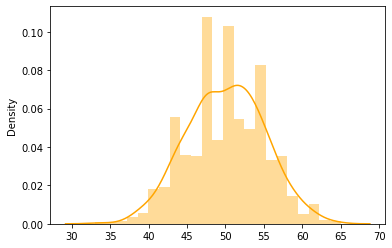

In [56]:
sns.distplot(heads_list, color='orange');